In [1]:
import requests
import csv
from datetime import datetime

In [7]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [8]:
def read_csv(filename):
    data = []
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(row)
    return data

In [9]:
def filter_meteorites_before_year(data, year):
    filtered_data = [item for item in data if item['year'] and int(item['year'].split('-')[0]) < year]
    return filtered_data

In [10]:
def filter_meteorites_before_year_with_coordinates(data, year):
    filtered_data = [item for item in data if item['year'] and item['reclat'] and item['reclong']
                     and int(item['year'].split('-')[0]) < year]
    return filtered_data

In [11]:
def filter_meteorites_with_mass_above_threshold(data, mass_threshold):
    filtered_data = [item for item in data if item['mass'] and float(item['mass']) > mass_threshold]
    return filtered_data

In [12]:
def plot_coordinates(data, title):
    lats = [float(item['reclat']) for item in data]
    longs = [float(item['reclong']) for item in data]

    plt.scatter(longs, lats, color='b', alpha=0.5)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(title)
    plt.show()

In [14]:
# Read the data from the CSV file
csv_filename = 'processed_data.csv'
data = read_csv(csv_filename)
data

[{'Name of Earth Meteorite': 'Aachen',
  'id': '1',
  'Meteorite': 'Valid',
  'recclass': 'L5',
  'mass': '',
  'year': '1880-01-01 00:00:00',
  'reclat': '50.775',
  'reclong': '6.08333',
  'point coordinates': '[None, None]'},
 {'Name of Earth Meteorite': 'Aarhus',
  'id': '2',
  'Meteorite': 'Valid',
  'recclass': 'H6',
  'mass': '',
  'year': '1951-01-01 00:00:00',
  'reclat': '56.18333',
  'reclong': '10.23333',
  'point coordinates': '[None, None]'},
 {'Name of Earth Meteorite': 'Abee',
  'id': '6',
  'Meteorite': 'Valid',
  'recclass': 'EH4',
  'mass': '',
  'year': '1952-01-01 00:00:00',
  'reclat': '54.21667',
  'reclong': '-113.0',
  'point coordinates': '[None, None]'},
 {'Name of Earth Meteorite': 'Acapulco',
  'id': '10',
  'Meteorite': 'Valid',
  'recclass': 'Acapulcoite',
  'mass': '',
  'year': '1976-01-01 00:00:00',
  'reclat': '16.88333',
  'reclong': '-99.9',
  'point coordinates': '[None, None]'},
 {'Name of Earth Meteorite': 'Achiras',
  'id': '370',
  'Meteorite':

In [15]:
# Get all the Earth meteorites that fell before the year 2000
meteorites_before_2000 = filter_meteorites_before_year(data, 2000)
print(f"Number of Earth meteorites before 2000: {len(meteorites_before_2000)}")

Number of Earth meteorites before 2000: 929


In [16]:
# Get all the Earth meteorites' coordinates that fell before the year 1970
meteorites_coordinates_before_1970 = filter_meteorites_before_year_with_coordinates(data, 1970)
print(f"Number of Earth meteorites with coordinates before 1970: {len(meteorites_coordinates_before_1970)}")

Number of Earth meteorites with coordinates before 1970: 774


In [17]:
# Assuming the mass of Earth meteorites was in kg, get all those with mass more than 10000 kg
meteorites_with_mass_above_10000kg = filter_meteorites_with_mass_above_threshold(data, 10000)
print(f"Number of Earth meteorites with mass above 10000 kg: {len(meteorites_with_mass_above_10000kg)}")

Number of Earth meteorites with mass above 10000 kg: 0


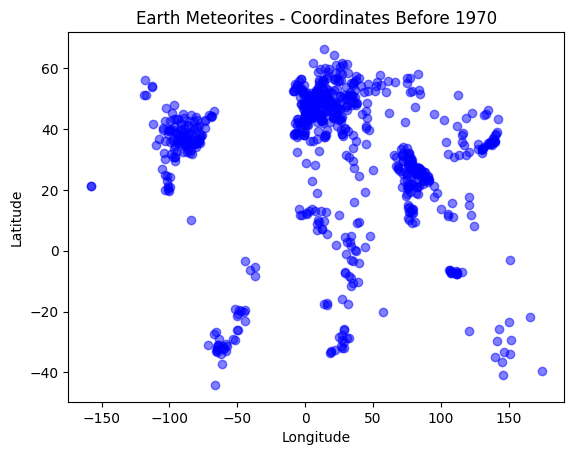

In [18]:
# Plot the coordinates of meteorites that fell before 1970
plot_coordinates(meteorites_coordinates_before_1970, 'Earth Meteorites - Coordinates Before 1970')